https://covidtracking.com/data/download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#df = pd.read_csv('https://covidtracking.com/api/v1/states/ga/daily.csv')
dfUnfiltered = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')
dfUnfiltered.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200709,AK,1272.0,134472.0,NaN,28.0,NaN,NaN,NaN,0.0,...,135744,0,0,55912ff71f785e526d4154c6ddd12b7188f17807,0,0,0,0,0,NaN
1,20200709,AL,49174.0,421330.0,NaN,1125.0,3039.0,NaN,877.0,NaN,...,470504,10,33,ce6e123b52713c8777e9a0b9e97cc7253918fb4a,0,0,0,0,0,NaN
2,20200709,AR,26052.0,338609.0,NaN,394.0,1705.0,NaN,NaN,82.0,...,364661,8,50,2304123e9efb7d9acddc325ed20a6d6122369ad0,0,0,0,0,0,NaN
3,20200709,AS,0.0,816.0,NaN,NaN,NaN,NaN,NaN,NaN,...,816,0,0,e85331d18c89b1fb0e574f6ab922f42792ac0936,0,0,0,0,0,NaN
4,20200709,AZ,112671.0,540390.0,NaN,3437.0,5526.0,861.0,NaN,575.0,...,653061,75,139,3332d02c6de87314b5c925c2ad90f888e84e4947,0,0,0,0,0,NaN


In [88]:
# Set the state
state = 'GA'

In [89]:
# Check columns included, if needed
#dfUnfiltered.columns

In [90]:
# Define the subset of columns
cols = {'date', 'state', 'positiveIncrease', 'totalTestResultsIncrease', 'deathIncrease'}

In [91]:
# Filter for the state and set columns
df = dfUnfiltered[dfUnfiltered['state']==state][cols]

In [92]:
# Confirm the state has data
df['date'].count()

128

In [93]:
# Remove the early data, prior to there being no reported positive tests
df = df[df['positiveIncrease']/df['totalTestResultsIncrease'] < 0.4]
df.head(200)

,state,date,deathIncrease,totalTestResultsIncrease,positiveIncrease
11,GA,20200709,8,19013,2837
67,GA,20200708,23,20957,3420
123,GA,20200707,21,20499,3406
179,GA,20200706,18,9768,1548
235,GA,20200705,3,22826,2197
...,...,...,...,...,...
6115,GA,20200322,9,956,93
6171,GA,20200321,1,678,87
6227,GA,20200320,3,555,133
6283,GA,20200319,9,323,90


In [94]:
# Check for data anomolies (negative number of test results)
df[df['totalTestResultsIncrease']<=0]

,state,date,deathIncrease,totalTestResultsIncrease,positiveIncrease
2419,GA,20200527,36,-74189,691


In [95]:
# Anomoly handler for negative totalTestResultsIncrease on May 27
zeroIndexes = df[df['totalTestResultsIncrease']<=0].index
df.at[zeroIndexes, 'totalTestResultsIncrease'] = np.nan

In [96]:
# Define the x-axis and convert date strings to date type
x = pd.to_datetime(df['date'], format='%Y%m%d').to_numpy()

In [97]:
# Define the y-axes
y1 = df['positiveIncrease'].to_numpy()
y2 = df['totalTestResultsIncrease'].to_numpy()
y3 = df['deathIncrease'].to_numpy()
y = np.divide(y1, y2)*100

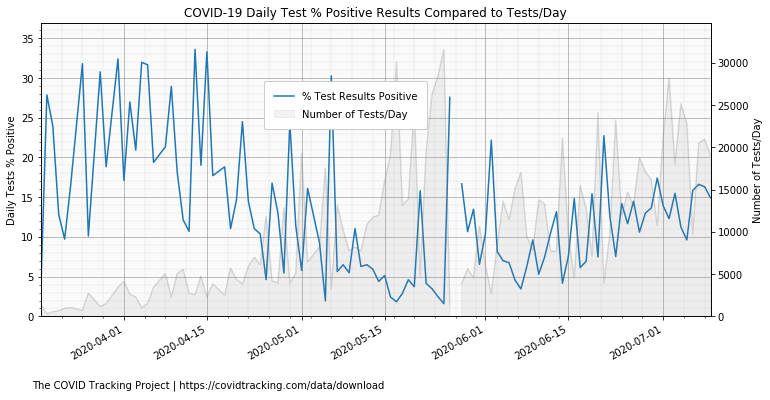

In [98]:
fig, axis1 = plt.subplots(constrained_layout=False, figsize=(12,6))
axis1.plot(x, y, label='% Test Results Positive')
fig.autofmt_xdate()
axis1.set_facecolor('#FAFAFA')
axis1.set_xlabel('')
axis1.set_ylabel('Daily Tests % Positive')
axis1.set_title('COVID-19 Daily Test % Positive Results Compared to Tests/Day')
axis1.set_xlim(min(x), max(x))
axis1.set_ylim(0, max(y)*1.1)
axis1.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
axis1.minorticks_on()
axis1.grid(which='minor', linestyle=':', linewidth='0.2', color='gray')

axis2 = axis1.twinx()
axis2.fill_between( x, y2, color="gray", alpha=0.1, label='Number of Tests/Day')
axis2.plot(x,y2,color='gray', alpha=0.2)
axis2.set_ylabel('Number of Tests/Day')
axis2.set_xlim(min(x), max(x))
axis2.set_ylim(0, max(y2)*1.1)

fig.legend(bbox_to_anchor=(0.5, 0.75), borderpad=1, framealpha=1, labelspacing=0.8)

annotation = axis1.annotate(
    'The COVID Tracking Project | https://covidtracking.com/data/download',
    xy=(0.25, 0), xytext=(0, 10),
    xycoords=('axes fraction', 'figure fraction'),
    textcoords='offset points',
    size=10, ha='center', va='bottom'
)

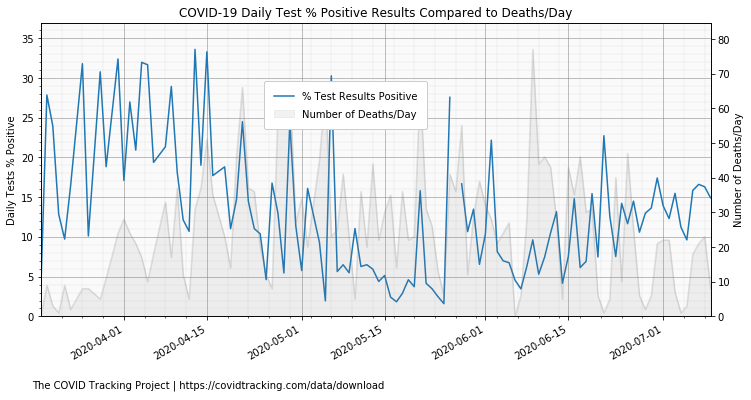

In [99]:
fig, axis1 = plt.subplots(constrained_layout=False, figsize=(12,6))
axis1.plot(x, y, label='% Test Results Positive')
fig.autofmt_xdate()
axis1.set_facecolor('#FAFAFA')
axis1.set_xlabel('')
axis1.set_ylabel('Daily Tests % Positive')
axis1.set_title('COVID-19 Daily Test % Positive Results Compared to Deaths/Day')
axis1.set_xlim(min(x), max(x))
axis1.set_ylim(0, max(y)*1.1)
axis1.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
axis1.minorticks_on()
axis1.grid(which='minor', linestyle=':', linewidth='0.2', color='gray')

axis2 = axis1.twinx()
axis2.fill_between( x, y3, color="gray", alpha=0.1, label='Number of Deaths/Day')
axis2.plot(x, y3, color='gray', alpha=0.2)
axis2.set_ylabel('Number of Deaths/Day')
axis2.set_xlim(min(x), max(x))
axis2.set_ylim(0, max(y3)*1.1)

fig.legend(bbox_to_anchor=(0.5, 0.75), borderpad=1, framealpha=1, labelspacing=0.8)

annotation = axis1.annotate(
    'The COVID Tracking Project | https://covidtracking.com/data/download',
    xy=(0.25, 0), xytext=(0, 10),
    xycoords=('axes fraction', 'figure fraction'),
    textcoords='offset points',
    size=10, ha='center', va='bottom'
)